In [ ]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# Neural_Network_housepricedata_GColabs
# Dokumentasi ChatGPT : https://chatgpt.com/share/bff7ba9b-df82-4ebd-b75a-70e97e7c8491

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [13]:
# Path ke file di Google Drive
file_path = '/content/drive/MyDrive/Semester8/Machine Learning/lecture 9/dataset/housepricedata.csv'

# Membaca file CSV sebagai DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


#Preprocess Data

In [10]:
# Pisahkan fitur dan target
features = df.drop(columns=['AboveMedianPrice'])
target = df['AboveMedianPrice']

# Normalisasi fitur
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split data menjadi 70% train dan 30% validation + test
X_train, X_val_test, y_train, y_val_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Split 30% validation + test menjadi 50% validation dan 50% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


#Membuat Model NN

In [11]:
# Buat model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


#Melatih Model

In [12]:
# Latih model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.6919 - accuracy: 0.5910 - val_loss: 0.6870 - val_accuracy: 0.6210
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6409 - val_loss: 0.6785 - val_accuracy: 0.6804
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.6888 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.7025 - val_loss: 0.6683 - val_accuracy: 0.6347
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.6321 - val_loss: 0.6639 - val_accuracy: 0.6256
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6536 - val_loss: 0.6596 - val_accuracy: 0.6438
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.6800 - val_loss: 0.6551 - val_accuracy: 0.6667
Epoch 8/100
3

#Visualisasi Loss dan Akurasi

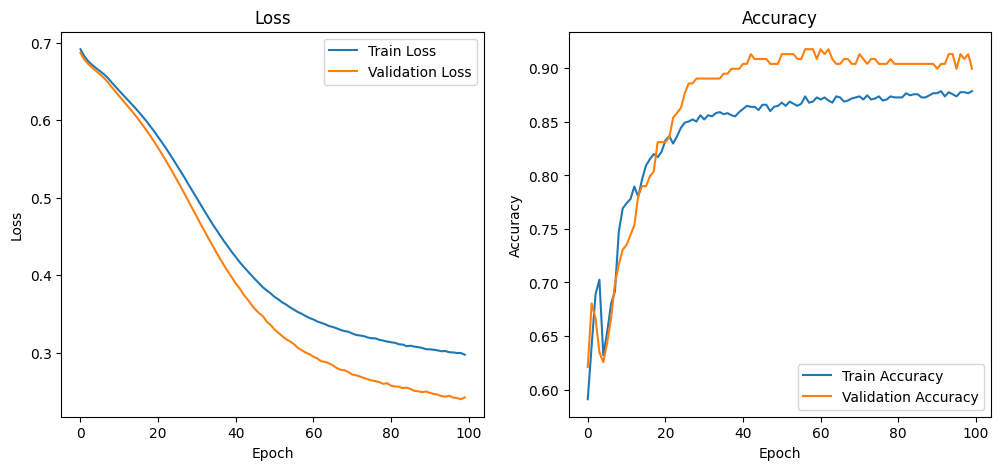

In [14]:
# Visualisasi Loss dan Akurasi
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Evaluasi Model Pada Dataset


In [15]:
# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.8904
Test Loss: 0.2545017898082733
Test Accuracy: 0.8904109597206116


In [16]:
# Model 2: Neural Network tanpa regularisasi
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model 2
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Latih Model 2
history2 = model2.fit(X_train, y_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(X_val, y_val))


Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7088 - accuracy: 0.4883 - val_loss: 0.7000 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4795 - val_loss: 0.6884 - val_accuracy: 0.5434
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.6282 - val_loss: 0.6795 - val_accuracy: 0.7397
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6614 - val_loss: 0.6717 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6145 - val_loss: 0.6651 - val_accuracy: 0.6301
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.6067 - val_loss: 0.6592 - val_accuracy: 0.6210
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6204 - val_loss: 0.6534 - val_accuracy: 0.6393
Epoch 8/100
3

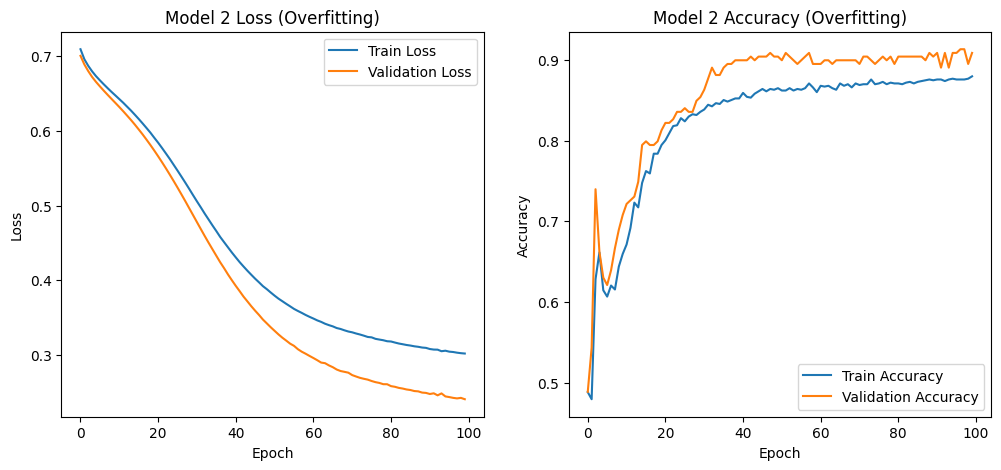

In [17]:
# Visualisasi Loss dan Akurasi Model 2
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss (Overfitting)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy (Overfitting)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
